In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/hungary_chickenpox.csv')

# Display the first few rows of the dataset to understand its structure
data.head()


,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,03/01/2005,168,79,30,173,169,42,136,120,162,...,130,57,2,178,66,64,11,29,87,68
1,10/01/2005,157,60,30,92,200,53,51,70,84,...,80,50,29,141,48,29,58,53,68,26
2,17/01/2005,96,44,31,86,93,30,93,84,191,...,64,46,4,157,33,33,24,18,62,44
3,24/01/2005,163,49,43,126,46,39,52,114,107,...,63,54,14,107,66,50,25,21,43,31
4,31/01/2005,122,78,53,87,103,34,95,131,172,...,61,49,11,124,63,56,7,47,85,60


In [ ]:
import pandas as pd

# Assuming you've already loaded the data as `data`
dates = data['Date'].tolist()
regions = data.columns[1:].tolist()

stacked_data = []
for index, row in data.iterrows():
    record = {"date": row['Date']}
    for region in regions:
        record[region] = row[region]
    stacked_data.append(record)


In [ ]:
%%html
<script src="https://d3js.org/d3.v5.min.js"></script>
<div id="d3-container"></div>
<script>

// Mock GeoJSON data (replace with actual GeoJSON for Hungary's regions)
var hungaryGeoJSON = {
    "type": "FeatureCollection",
    "features": [
        // ... Actual GeoJSON data for each region goes here ...
    ]
};

// Data (total chickenpox cases for each region)
var data = """ + total_cases_per_region.to_json(orient='records') + """;

// SVG canvas dimensions
var margin = {top: 20, right: 20, bottom: 50, left: 50},
    width = 960 - margin.left - margin.right,
    height = 500 - margin.top - margin.bottom;

// Append SVG canvas
var svg = d3.select("#d3-map")
    .append("svg")
    .attr("width", width + margin.left + margin.right)
    .attr("height", height + margin.top + margin.bottom)
    .append("g")
    .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

// Map projection (this is a mock projection; you'd use an actual projection for Hungary)
var projection = d3.geoMercator().fitSize([width, height], hungaryGeoJSON);
var path = d3.geoPath().projection(projection);

// Color scale for the choropleth map
var colorScale = d3.scaleSequential(d3.interpolateBlues)
    .domain([0, d3.max(data, function(d) { return d.TotalCases; })]);

// Plot each region with the appropriate color
svg.selectAll("path")
    .data(hungaryGeoJSON.features)
    .enter()
    .append("path")
    .attr("d", path)
    .attr("fill", function(d) {
        var regionData = data.find(function(r) { return r.Region === d.properties.name; });
        return regionData ? colorScale(regionData.TotalCases) : "#ccc";
    });
    </script>


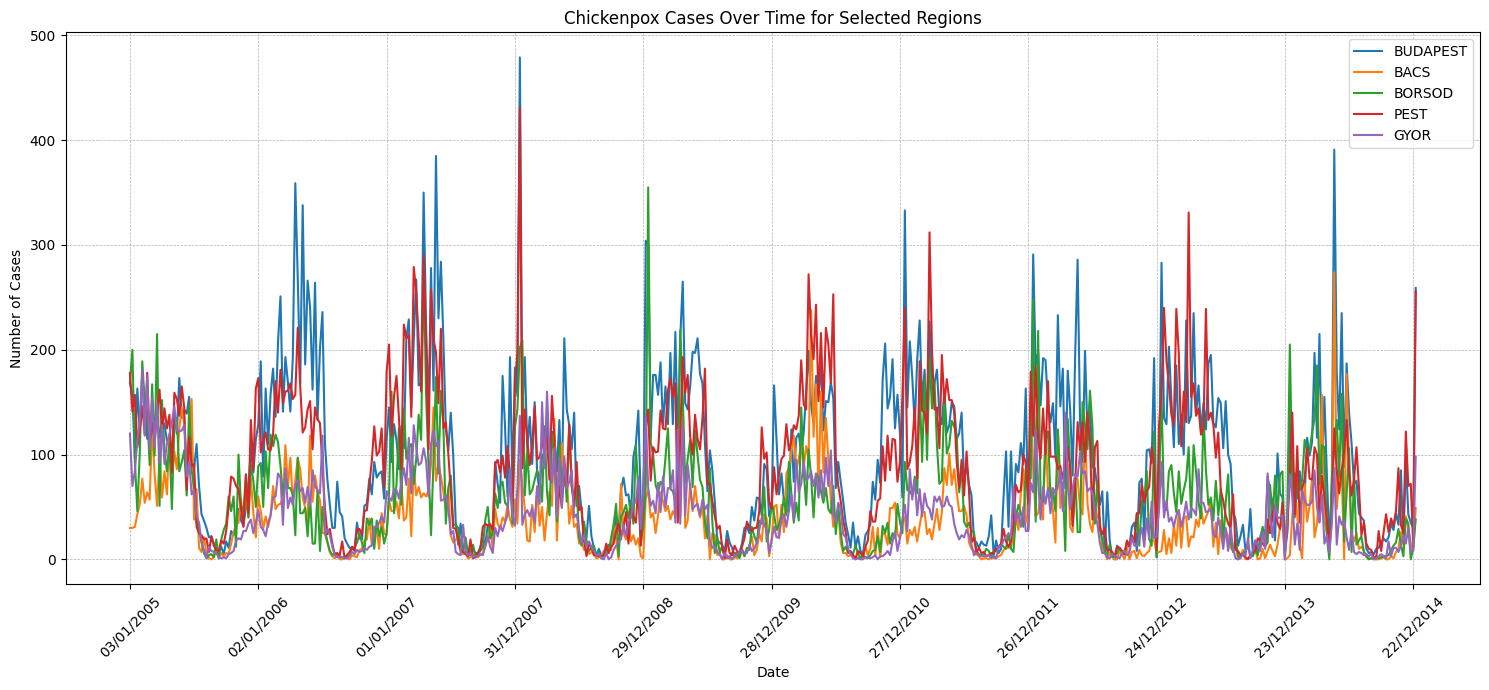

In [ ]:
import matplotlib.pyplot as plt

# Selected regions for visualization
selected_regions = ['BUDAPEST', 'BACS', 'BORSOD', 'PEST', 'GYOR']

plt.figure(figsize=(15, 7))
for region in selected_regions:
    plt.plot(data['Date'], data[region], label=region)

plt.title('Chickenpox Cases Over Time for Selected Regions')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(data['Date'][::52], rotation=45)  # Displaying one year interval for clarity
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [ ]:
stacked_area_code_colab = """
<script src="https://d3js.org/d3.v5.min.js"></script>
<div id="d3-stacked-area"></div>
<script>

// Data
var data = """ + str(stacked_data) + """;
var regions = """ + str(regions) + """;

// SVG canvas dimensions
var margin = {top: 20, right: 20, bottom: 50, left: 50},
    width = 960 - margin.left - margin.right,
    height = 500 - margin.top - margin.bottom;

// Append SVG canvas
var svg = d3.select("#d3-stacked-area")
    .append("svg")
    .attr("width", width + margin.left + margin.right)
    .attr("height", height + margin.top + margin.bottom)
    .append("g")
    .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

// X and Y scales
var x = d3.scaleLinear().range([0, width]);
var y = d3.scaleLinear().range([height, 0]);

// Set domain for x and y scales
x.domain(d3.extent(data, function(d) { return d.date; }));
y.domain([0, d3.max(data, function(d) {
    var total = 0;
    for (var region of regions) {
        total += d[region];
    }
    return total;
})]);

// Define the stack layout
var stack = d3.stack()
    .keys(regions)
    .order(d3.stackOrderNone)
    .offset(d3.stackOffsetNone);

var stackedData = stack(data);

// Define area generator
var area = d3.area()
    .x(function(d) { return x(d.data.date); })
    .y0(function(d) { return y(d[0]); })
    .y1(function(d) { return y(d[1]); });

// Color scale
var color = d3.scaleOrdinal(d3.schemeCategory10);

// Add the areas
svg.selectAll("path")
    .data(stackedData)
    .enter()
    .append("path")
    .attr("d", area)
    .attr("fill", function(d) { return color(d.key); });

// Add X Axis
svg.append("g")
    .attr("transform", "translate(0," + height + ")")
    .call(d3.axisBottom(x));

// Add Y Axis
svg.append("g")
    .call(d3.axisLeft(y));

</script>
"""

stacked_area_code_colab


'\n<script src="https://d3js.org/d3.v5.min.js"></script>\n<div id="d3-stacked-area"></div>\n<script>\n\n// Data\nvar data = [{\'date\': \'03/01/2005\', \'BUDAPEST\': 168, \'BARANYA\': 79, \'BACS\': 30, \'BEKES\': 173, \'BORSOD\': 169, \'CSONGRAD\': 42, \'FEJER\': 136, \'GYOR\': 120, \'HAJDU\': 162, \'HEVES\': 36, \'JASZ\': 130, \'KOMAROM\': 57, \'NOGRAD\': 2, \'PEST\': 178, \'SOMOGY\': 66, \'SZABOLCS\': 64, \'TOLNA\': 11, \'VAS\': 29, \'VESZPREM\': 87, \'ZALA\': 68}, {\'date\': \'10/01/2005\', \'BUDAPEST\': 157, \'BARANYA\': 60, \'BACS\': 30, \'BEKES\': 92, \'BORSOD\': 200, \'CSONGRAD\': 53, \'FEJER\': 51, \'GYOR\': 70, \'HAJDU\': 84, \'HEVES\': 28, \'JASZ\': 80, \'KOMAROM\': 50, \'NOGRAD\': 29, \'PEST\': 141, \'SOMOGY\': 48, \'SZABOLCS\': 29, \'TOLNA\': 58, \'VAS\': 53, \'VESZPREM\': 68, \'ZALA\': 26}, {\'date\': \'17/01/2005\', \'BUDAPEST\': 96, \'BARANYA\': 44, \'BACS\': 31, \'BEKES\': 86, \'BORSOD\': 93, \'CSONGRAD\': 30, \'FEJER\': 93, \'GYOR\': 84, \'HAJDU\': 191, \'HEVES\': 51, 

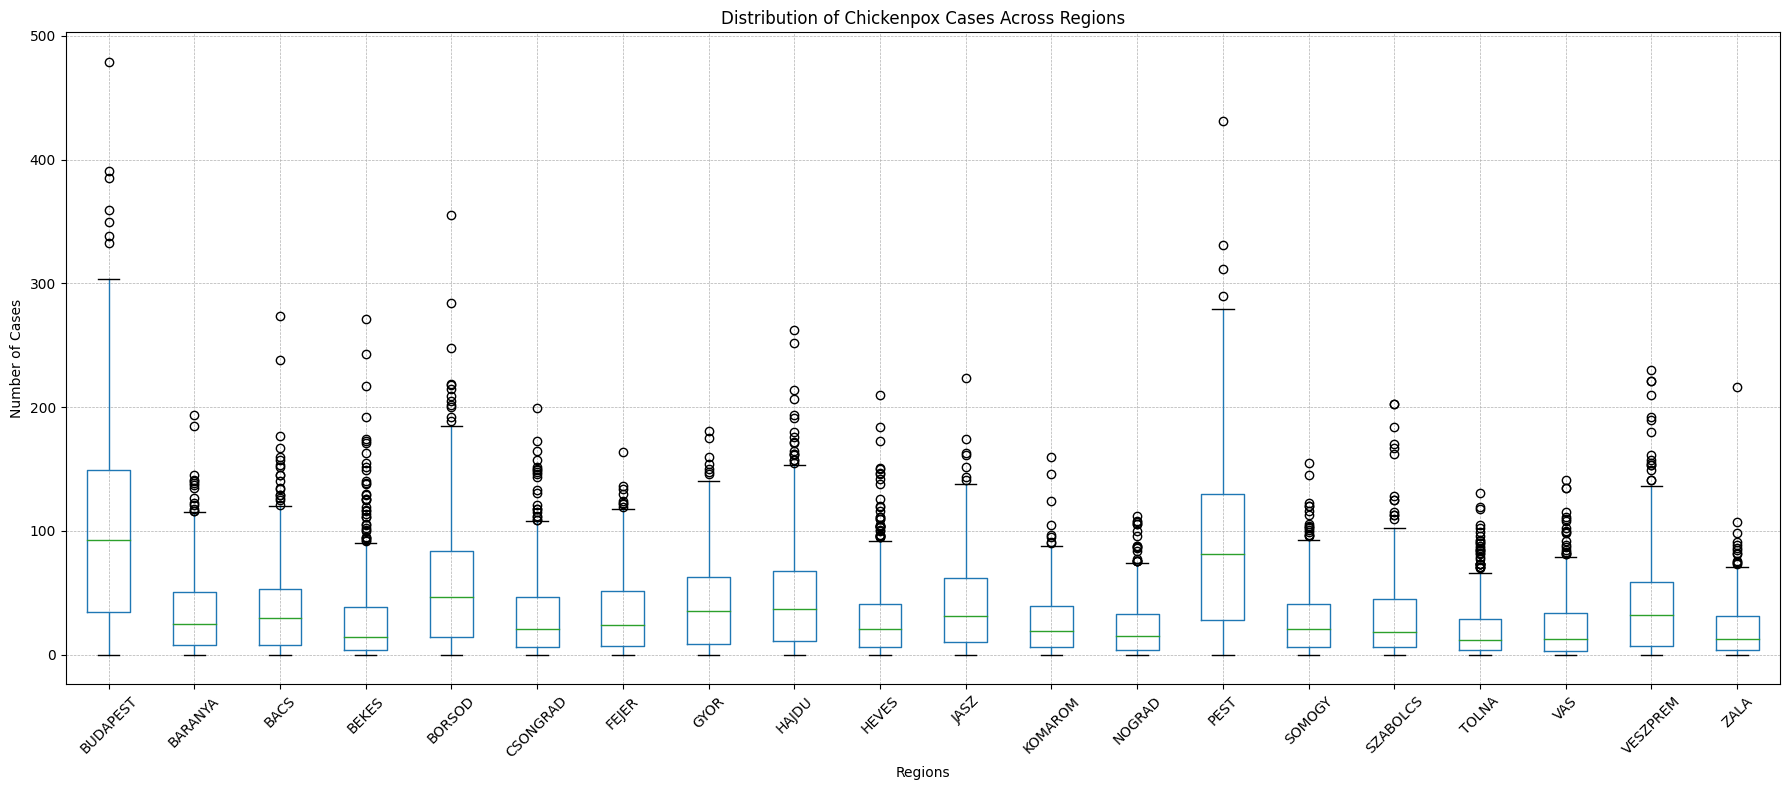

In [ ]:
# Correcting the approach to plot boxplots for each region
plt.figure(figsize=(18, 8))
data.drop(columns='Date').boxplot(rot=45)
plt.title('Distribution of Chickenpox Cases Across Regions')
plt.xlabel('Regions')
plt.ylabel('Number of Cases')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# Stacked area chart visualization using D3.js

stacked_area_code = """
<script src="https://d3js.org/d3.v5.min.js"></script>
<div id="d3-stacked-area"></div>
<script>

// Data
var data = """ + str(stacked_data) + """;
var regions = """ + str(regions) + """;

// SVG canvas dimensions
var margin = {top: 20, right: 20, bottom: 50, left: 50},
    width = 960 - margin.left - margin.right,
    height = 500 - margin.top - margin.bottom;

// Append SVG canvas
var svg = d3.select("#d3-stacked-area")
    .append("svg")
    .attr("width", width + margin.left + margin.right)
    .attr("height", height + margin.top + margin.bottom)
    .append("g")
    .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

// X and Y scales
var x = d3.scaleLinear().range([0, width]);
var y = d3.scaleLinear().range([height, 0]);

// Set domain for x and y scales
x.domain(d3.extent(data, function(d) { return d.date; }));
y.domain([0, d3.max(data, function(d) {
    var total = 0;
    for (var region of regions) {
        total += d[region];
    }
    return total;
})]);

// Define the stack layout
var stack = d3.stack()
    .keys(regions)
    .order(d3.stackOrderNone)
    .offset(d3.stackOffsetNone);

var stackedData = stack(data);

// Define area generator
var area = d3.area()
    .x(function(d) { return x(d.data.date); })
    .y0(function(d) { return y(d[0]); })
    .y1(function(d) { return y(d[1]); });

// Color scale
var color = d3.scaleOrdinal(d3.schemeCategory10);

// Add the areas
svg.selectAll("path")
    .data(stackedData)
    .enter()
    .append("path")
    .attr("d", area)
    .attr("fill", function(d) { return color(d.key); });

// Add X Axis
svg.append("g")
    .attr("transform", "translate(0," + height + ")")
    .call(d3.axisBottom(x));

// Add Y Axis
svg.append("g")
    .call(d3.axisLeft(y));

</script>
"""

# Display the stacked area chart visualization in the notebook
display(HTML(stacked_area_code))


In [ ]:
# Assuming you've already loaded the data as `data`
total_cases_per_region = data.drop(columns='Date').sum().reset_index()
total_cases_per_region.columns = ['Region', 'TotalCases']


In [ ]:
# Mock choropleth map visualization using D3.js with pseudo-GeoJSON data

choropleth_code = """
<script src="https://d3js.org/d3.v5.min.js"></script>
<div id="d3-map"></div>
<script>

// Mock GeoJSON data (replace with actual GeoJSON for Hungary's regions)
var hungaryGeoJSON = {
    "type": "FeatureCollection",
    "features": [
        // ... Actual GeoJSON data for each region goes here ...
    ]
};

// Data (total chickenpox cases for each region)
var data = """ + total_cases_per_region.to_json(orient='records') + """;

// SVG canvas dimensions
var margin = {top: 20, right: 20, bottom: 50, left: 50},
    width = 960 - margin.left - margin.right,
    height = 500 - margin.top - margin.bottom;

// Append SVG canvas
var svg = d3.select("#d3-map")
    .append("svg")
    .attr("width", width + margin.left + margin.right)
    .attr("height", height + margin.top + margin.bottom)
    .append("g")
    .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

// Map projection (this is a mock projection; you'd use an actual projection for Hungary)
var projection = d3.geoMercator().fitSize([width, height], hungaryGeoJSON);
var path = d3.geoPath().projection(projection);

// Color scale for the choropleth map
var colorScale = d3.scaleSequential(d3.interpolateBlues)
    .domain([0, d3.max(data, function(d) { return d.TotalCases; })]);

// Plot each region with the appropriate color
svg.selectAll("path")
    .data(hungaryGeoJSON.features)
    .enter()
    .append("path")
    .attr("d", path)
    .attr("fill", function(d) {
        var regionData = data.find(function(r) { return r.Region === d.properties.name; });
        return regionData ? colorScale(regionData.TotalCases) : "#ccc";
    });

</script>
"""

# Display the mock choropleth map visualization in the notebook
display(HTML(choropleth_code))


In [ ]:
# Mock choropleth "rectangle" visualization using D3.js as a workaround

choropleth_rectangle_code = """
<script src="https://d3js.org/d3.v5.min.js"></script>
<div id="d3-mock-map"></div>
<script>

// Data (total chickenpox cases for each region)
var data = """ + total_cases_per_region.to_json(orient='records') + """;

// SVG canvas dimensions
var margin = {top: 20, right: 20, bottom: 50, left: 50},
    width = 960 - margin.left - margin.right,
    height = 500 - margin.top - margin.bottom;

// Append SVG canvas
var svg = d3.select("#d3-mock-map")
    .append("svg")
    .attr("width", width + margin.left + margin.right)
    .attr("height", height + margin.top + margin.bottom)
    .append("g")
    .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

// Color scale for the choropleth map
var colorScale = d3.scaleSequential(d3.interpolateBlues)
    .domain([0, d3.max(data, function(d) { return d.TotalCases; })]);

// Mock rectangle dimensions
var rectWidth = width / data.length;
var rectHeight = height;

// Plot each "mock" region (rectangle) with the appropriate color
svg.selectAll("rect")
    .data(data)
    .enter()
    .append("rect")
    .attr("x", function(d, i) { return i * rectWidth; })
    .attr("y", 0)
    .attr("width", rectWidth)
    .attr("height", rectHeight)
    .attr("fill", function(d) { return colorScale(d.TotalCases); })
    .append("title")  // Tooltip for each rectangle showing the region name and total cases
    .text(function(d) { return d.Region + ": " + d.TotalCases + " cases"; });

</script>
"""

choropleth_rectangle_code


'\n<script src="https://d3js.org/d3.v5.min.js"></script>\n<div id="d3-mock-map"></div>\n<script>\n\n// Data (total chickenpox cases for each region)\nvar data = [{"Region":"BUDAPEST","TotalCases":52850},{"Region":"BARANYA","TotalCases":17855},{"Region":"BACS","TotalCases":19401},{"Region":"BEKES","TotalCases":15092},{"Region":"BORSOD","TotalCases":29797},{"Region":"CSONGRAD","TotalCases":16437},{"Region":"FEJER","TotalCases":17368},{"Region":"GYOR","TotalCases":21630},{"Region":"HAJDU","TotalCases":24585},{"Region":"HEVES","TotalCases":15499},{"Region":"JASZ","TotalCases":21334},{"Region":"KOMAROM","TotalCases":13386},{"Region":"NOGRAD","TotalCases":11406},{"Region":"PEST","TotalCases":44945},{"Region":"SOMOGY","TotalCases":14412},{"Region":"SZABOLCS","TotalCases":15584},{"Region":"TOLNA","TotalCases":10624},{"Region":"VAS","TotalCases":11728},{"Region":"VESZPREM","TotalCases":21212},{"Region":"ZALA","TotalCases":10374}];\n\n// SVG canvas dimensions\nvar margin = {top: 20, right: 20, b

In [ ]:
# Multi-Line Chart with Focus+Context (Brushing) using D3.js

multiline_focus_context_code = """
<script src="https://d3js.org/d3.v5.min.js"></script>
<div id="d3-multiline"></div>
<script>

// Data
var data = """ + str(stacked_data) + """;
var regions = """ + str(regions) + """;

// SVG canvas dimensions
var margin = {top: 10, right: 10, bottom: 100, left: 40},
    margin2 = {top: 430, right: 10, bottom: 20, left: 40},
    width = 960 - margin.left - margin.right,
    height = 500 - margin.top - margin.bottom,
    height2 = 500 - margin2.top - margin2.bottom;

// Append SVG canvas
var svg = d3.select("#d3-multiline")
    .append("svg")
    .attr("width", width + margin.left + margin.right)
    .attr("height", height + margin.top + margin.bottom);

// Define main group and context group
var focus = svg.append("g").attr("transform", "translate(" + margin.left + "," + margin.top + ")");
var context = svg.append("g").attr("transform", "translate(" + margin2.left + "," + margin2.top + ")");

// X and Y scales for focus and context
var x = d3.scaleLinear().range([0, width]),
    x2 = d3.scaleLinear().range([0, width]),
    y = d3.scaleLinear().range([height, 0]),
    y2 = d3.scaleLinear().range([height2, 0]);

// Define brush and zoom
var brush = d3.brushX().extent([[0, 0], [width, height2]]).on("brush end", brushed);
var zoom = d3.zoom().scaleExtent([1, Infinity]).translateExtent([[0, 0], [width, height]]).extent([[0, 0], [width, height]]).on("zoom", zoomed);

// Set domain for x and y scales
x.domain(d3.extent(data, function(d) { return d.date; }));
y.domain([0, d3.max(data, function(d) { return d3.max(regions, function(region) { return d[region]; }); })]);
x2.domain(x.domain());
y2.domain(y.domain());

// Define line generators for focus and context
var line = d3.line()
    .x(function(d) { return x(d.date); })
    .y(function(d) { return y(d.value); });
var line2 = d3.line()
    .x(function(d) { return x2(d.date); })
    .y(function(d) { return y2(d.value); });

// Create clip path (to ensure lines don't go outside the chart area during zoom)
svg.append("defs").append("clipPath")
    .attr("id", "clip")
    .append("rect")
    .attr("width", width)
    .attr("height", height);

// Add lines for each region in focus
focus.selectAll(".line")
    .data(regions)
    .enter().append("path")
    .attr("class", "line")
    .attr("clip-path", "url(#clip)")
    .attr("d", function(region) {
        return line(data.map(function(d) {
            return {date: d.date, value: d[region]};
        }));
    });

// Add lines for each region in context
context.selectAll(".line")
    .data(regions)
    .enter().append("path")
    .attr("class", "line")
    .attr("d", function(region) {
        return line2(data.map(function(d) {
            return {date: d.date, value: d[region]};
        }));
    });

// Add brush to context
context.append("g")
    .attr("class", "brush")
    .call(brush)
    .call(brush.move, x.range());

// Functions to handle brushing and zooming
function brushed() {
    if (d3.event.sourceEvent && d3.event.sourceEvent.type === "zoom") return; // ignore brush-by-zoom
    var s = d3.event.selection || x2.range();
    x.domain(s.map(x2.invert, x2));
    focus.selectAll(".line")
        .attr("d", function(region) {
            return line(data.map(function(d) {
                return {date: d.date, value: d[region]};
            }));
        });
    svg.select(".zoom").call(zoom.transform, d3.zoomIdentity.scale(width / (s[1] - s[0])).translate(-s[0], 0));
}

function zoomed() {
    if (d3.event.sourceEvent && d3.event.sourceEvent.type === "brush") return; // ignore zoom-by-brush
    var t = d3.event.transform;
    x.domain(t.rescaleX(x2).domain());
    focus.selectAll(".line")
        .attr("d", function(region) {
            return line(data.map(function(d) {
                return {date: d.date, value: d[region]};
            }));
        });
    context.select(".brush").call(brush.move, x.range().map(t.invertX, t));
}

</script>
"""

multiline_focus_context_code


'\n<script src="https://d3js.org/d3.v5.min.js"></script>\n<div id="d3-multiline"></div>\n<script>\n\n// Data\nvar data = [{\'date\': \'03/01/2005\', \'BUDAPEST\': 168, \'BARANYA\': 79, \'BACS\': 30, \'BEKES\': 173, \'BORSOD\': 169, \'CSONGRAD\': 42, \'FEJER\': 136, \'GYOR\': 120, \'HAJDU\': 162, \'HEVES\': 36, \'JASZ\': 130, \'KOMAROM\': 57, \'NOGRAD\': 2, \'PEST\': 178, \'SOMOGY\': 66, \'SZABOLCS\': 64, \'TOLNA\': 11, \'VAS\': 29, \'VESZPREM\': 87, \'ZALA\': 68}, {\'date\': \'10/01/2005\', \'BUDAPEST\': 157, \'BARANYA\': 60, \'BACS\': 30, \'BEKES\': 92, \'BORSOD\': 200, \'CSONGRAD\': 53, \'FEJER\': 51, \'GYOR\': 70, \'HAJDU\': 84, \'HEVES\': 28, \'JASZ\': 80, \'KOMAROM\': 50, \'NOGRAD\': 29, \'PEST\': 141, \'SOMOGY\': 48, \'SZABOLCS\': 29, \'TOLNA\': 58, \'VAS\': 53, \'VESZPREM\': 68, \'ZALA\': 26}, {\'date\': \'17/01/2005\', \'BUDAPEST\': 96, \'BARANYA\': 44, \'BACS\': 31, \'BEKES\': 86, \'BORSOD\': 93, \'CSONGRAD\': 30, \'FEJER\': 93, \'GYOR\': 84, \'HAJDU\': 191, \'HEVES\': 51, \'J

In [ ]:
%%html
<script src="https://d3js.org/d3.v5.min.js"></script>
<div id="d3-multiline-simple"></div>
<script>

// Data
var data = ZALA
var regions = 3

// SVG canvas dimensions
var margin = {top: 20, right: 20, bottom: 50, left: 50},
    width = 960 - margin.left - margin.right,
    height = 500 - margin.top - margin.bottom;

// Append SVG canvas
var svg = d3.select("#d3-multiline-simple")
    .append("svg")
    .attr("width", width + margin.left + margin.right)
    .attr("height", height + margin.top + margin.bottom)
    .append("g")
    .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

// X and Y scales
var x = d3.scaleLinear().range([0, width]);
var y = d3.scaleLinear().range([height, 0]);

// Set domain for x and y scales
x.domain(d3.extent(data, function(d) { return d.date; }));
y.domain([0, d3.max(data, function(d) { return d3.max(regions, function(region) { return d[region]; }); })]);

// Define line generator
var line = d3.line()
    .x(function(d) { return x(d.date); })
    .y(function(d) { return y(d.value); });

// Color scale for different regions
var color = d3.scaleOrdinal(d3.schemeCategory10);

// Add lines for each region
regions.forEach(function(region, index) {
    svg.append("path")
        .datum(data.map(function(d) {
            return {date: d.date, value: d[region]};
        }))
        .attr("fill", "none")
        .attr("stroke", color(index))
        .attr("stroke-width", 1.5)
        .attr("d", line);
});

// Add X Axis
svg.append("g")
    .attr("transform", "translate(0," + height + ")")
    .call(d3.axisBottom(x));

// Add Y Axis
svg.append("g")
    .call(d3.axisLeft(y));

</script>


In [ ]:
import pandas as pd

# Assuming you've already loaded the data into a DataFrame named 'data'
# If not, uncomment the line below:
# data = pd.read_csv('/path_to_your_file/hungary_chickenpox.csv')

# Extracting data format
formatted_data = data.to_dict(orient='records')

# Extracting regions list
regions = data.columns[1:].tolist()

# Convert these extracted data into string format
data_string = str(formatted_data).replace("'", '"')  # Convert single quotes to double quotes for valid JSON
regions_string = str(regions).replace("'", '"')  # Convert single quotes to double quotes for valid JSON

data_string, regions_string[:5]  # Displaying the first 100 characters of regions_string for verification


('[{"Date": "03/01/2005", "BUDAPEST": 168, "BARANYA": 79, "BACS": 30, "BEKES": 173, "BORSOD": 169, "CSONGRAD": 42, "FEJER": 136, "GYOR": 120, "HAJDU": 162, "HEVES": 36, "JASZ": 130, "KOMAROM": 57, "NOGRAD": 2, "PEST": 178, "SOMOGY": 66, "SZABOLCS": 64, "TOLNA": 11, "VAS": 29, "VESZPREM": 87, "ZALA": 68}, {"Date": "10/01/2005", "BUDAPEST": 157, "BARANYA": 60, "BACS": 30, "BEKES": 92, "BORSOD": 200, "CSONGRAD": 53, "FEJER": 51, "GYOR": 70, "HAJDU": 84, "HEVES": 28, "JASZ": 80, "KOMAROM": 50, "NOGRAD": 29, "PEST": 141, "SOMOGY": 48, "SZABOLCS": 29, "TOLNA": 58, "VAS": 53, "VESZPREM": 68, "ZALA": 26}, {"Date": "17/01/2005", "BUDAPEST": 96, "BARANYA": 44, "BACS": 31, "BEKES": 86, "BORSOD": 93, "CSONGRAD": 30, "FEJER": 93, "GYOR": 84, "HAJDU": 191, "HEVES": 51, "JASZ": 64, "KOMAROM": 46, "NOGRAD": 4, "PEST": 157, "SOMOGY": 33, "SZABOLCS": 33, "TOLNA": 24, "VAS": 18, "VESZPREM": 62, "ZALA": 44}, {"Date": "24/01/2005", "BUDAPEST": 163, "BARANYA": 49, "BACS": 43, "BEKES": 126, "BORSOD": 46, "CS